In [10]:
from modules.client import OffVarianceClient
import modules.utils as utils
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

In [2]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win1'] >= 1.8) & (games_df['odds_open_win1'] <= 2.8) &
(games_df['odds_open_tm25'] >= 2.0) & (games_df['odds_open_tm25'] <= 2.5)
]

Count: 5408
Open profit: -168.66000000000005
Close profit: -160.82000000000005
Open ROI: -0.031187130177514802
Close ROI: -0.02973742603550297
UDI: -0.001617090367022305
AxesSubplot(0.125,0.125;0.775x0.755)


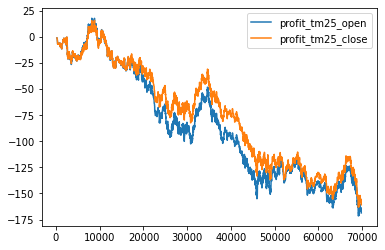

In [4]:
utils.print_total_under_result(segmented_df)

In [5]:
utils.analyze_correlation(segmented_df, 'total', utils.metrics)

,correlation
expected_total,0.081552
expected_total_loc,0.074628
expected_difference,0.024639
expected_difference_loc,0.022218


In [6]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_tm25')

,low,high,diff
expected_total_loc,2.827677,2.437566,0.390111
expected_total,2.775123,2.397319,0.377804
expected_difference,0.269606,0.209055,0.060551
expected_difference_loc,0.292787,0.234347,0.058440


In [8]:
updated_segmented_df = segmented_df.loc[
(segmented_df['expected_total'] <= 2.39) & (segmented_df['expected_total_loc'] <= 2.43)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'expected_total',
    'expected_total_loc',
], 'udi_tm25')

,low,high,diff
expected_total,2.145955,2.036313,0.109643
expected_total_loc,1.975655,1.910928,0.064727


Count: 201
Open profit: 33.379999999999995
Close profit: 18.229999999999997
Open ROI: 0.1660696517412935
Close ROI: 0.0906965174129353
UDI: 0.07463107247953175
AxesSubplot(0.125,0.125;0.775x0.755)


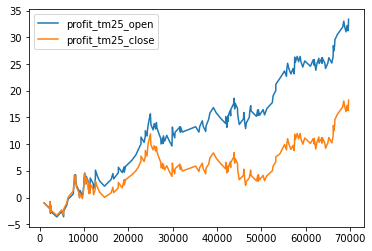

In [9]:
filtered_result_df = segmented_df.loc[
(segmented_df['expected_total'] <= 2.03) & (segmented_df['expected_total_loc'] <= 1.91)
]
utils.print_total_under_result(filtered_result_df)